In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def readImagesAndTimes():
    filenames = ["HDR_sample/img_0.008.jpg","HDR_sample/img_0.033.jpg","HDR_sample/img_0.066.jpg","HDR_sample/img_0.125.jpg","HDR_sample/img_1.0.jpg","HDR_sample/img_2.0.jpg"]

    times = np.array([1/125, 1/30, 1/15, 1/8, 1, 2], dtype=np.float32)

    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
        images.append(im)
    return images, times

In [29]:
# Aligning Images

images, times = readImagesAndTimes()

alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

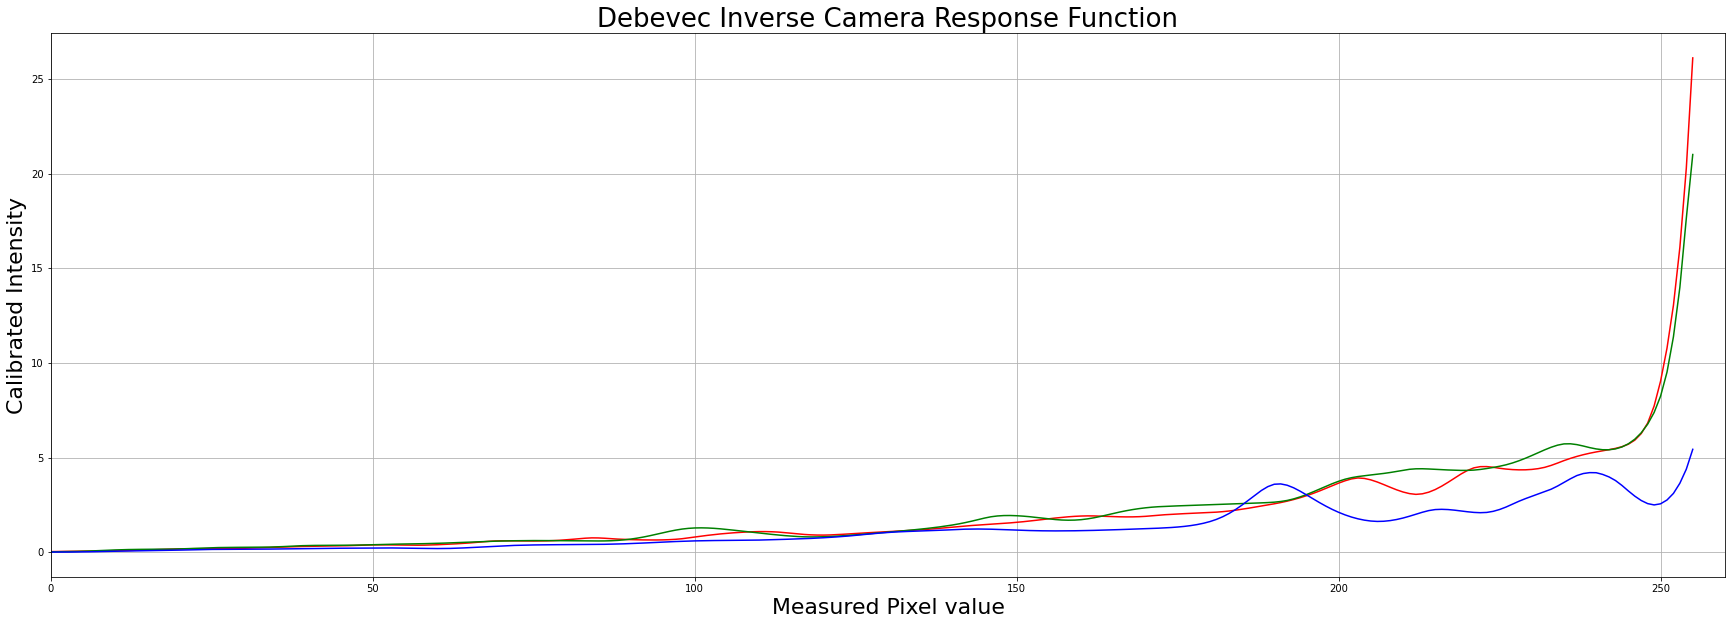

In [30]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

ax = plt.figure(figsize=[30,10])
plt.title("Debevec Inverse Camera Response Function",fontsize=26)
plt.xlabel("Measured Pixel value",fontsize = 22)
plt.ylabel("Calibrated Intensity",fontsize = 22)
plt.xlim([0,260])
plt.grid()
plt.plot(x,y[:,0],'r',x,y[:,1],'g',x,y[0:,2],'b')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


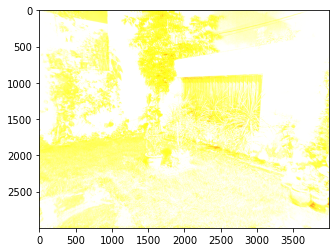

In [31]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
plt.imshow(hdrDebevec)

saved garden.jpg


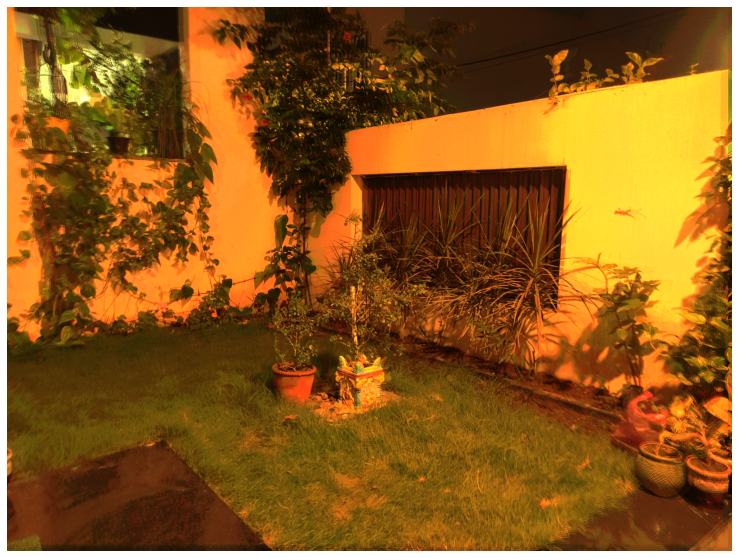

In [38]:
tonemapDrago = cv2.createTonemapDrago(0.85, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
plt.figure(figsize=[20,10]); plt.imshow(np.clip(ldrDrago, 0,1));plt.axis('off');
cv2.imwrite("garden.jpg",ldrDrago[:,:,::-1] * 255)
print("saved garden.jpg") 